# Acceptance rate scheme matches target rate

## ODE model

Let's start with an ODE model of a conversion reaction:

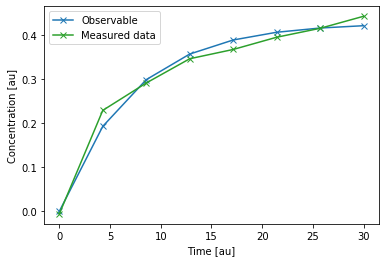

In [1]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=8)

# data
data = mv.get_model_noisy()(mv.p_true)

# plot it
mv.viz_data_and_sim(data)

In [2]:
print(mv.p_true)

{'p0': 0.06, 'p1': 0.08}


Now let's run it:

In [3]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

for pop_size in [100, 1000]:
    # define the analysis
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_ode = abc.new("sqlite:///h_cr.db", data)
    history_ode = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=3, start_time=2019-12-04 16:14:39.724805, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.1384e+01 for t=0.
INFO:ABC:t: 0, eps: 149.43794265530997.
DEBUG:Acceptor:Encountered pd=1.6790e+01 > c=1.1384e+01, thus weight=1.0368e+00.
DEBUG:Acceptor:Encountered pd=1.4592e+01 > c=1.1384e+01, thus weight=1.0217e+00.
DEBUG:Acceptor:Encountered pd=1.5017e+01 > c=1.1384e+01, thus weight=1.0246e+00.
DEBUG:Acceptor:Encountered pd=1.7933e+01 > c=1.1384e+01, thus weight=1.0448e+00.
DEBUG:Acceptor:Encountered pd=1.6893e+01 > c=1.1384e+01, thus weight=1.0376e+00.
DEBUG:Acceptor:Encountered pd=1.4958e+01 > c=1.1384e+01, thus weight=1.0242e+00.
DEBUG:Acceptor:Encountered pd=1.4236e+01 > c=1.1384e+01, thus weight=1.0193e+00.
INFO:ABC:Acceptance rate: 100 / 415 = 2.4096e-01, ESS=9.9994e+01.
DEBUG:Acceptor:pdf_norm=1.7933e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [40.77851598392364].
INFO:ABC:t: 1, eps: 40.77851598392364.
DEBUG:Acceptor

Some visualizations:

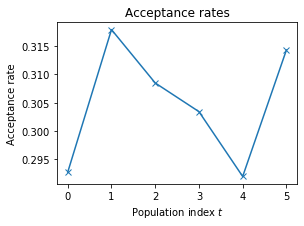

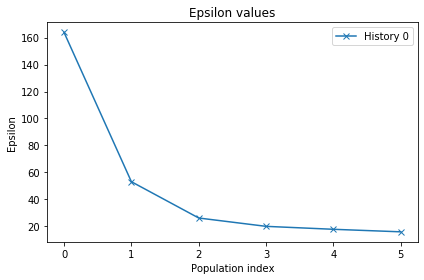

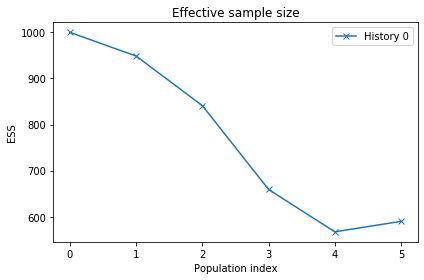

In [4]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_ode)

plt.gcf().set_size_inches((4, 3))
plt.gca().get_legend().remove()
plt.savefig("acc_rate.svg", format='svg')
pyabc.visualization.plot_epsilons(history_ode)
pyabc.visualization.plot_effective_sample_sizes(history_ode)

## MJP model

Next, let's go for an MJP model of gene expression:

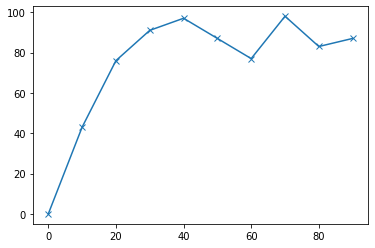

In [5]:
import pyabc
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# model
mv = ModelVars(n_t=10)

# data
data = mv.get_model_noisy()(mv.p_true)

# plot
plt.plot(data['t'], data['mrna'], 'x-')

In [6]:
print(mv.p_true)

OrderedDict([('transcription', 10), ('decay', 0.1)])


In [6]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

# define the analysis
for pop_size in [100, 1000]:
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_mjp = abc.new("sqlite:///h_mrna.db", data)
    history_mjp = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-25 10:16:26.402543, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-6.0677e+01 for t=0.
INFO:ABC:t: 0, eps: 1903.025677821061.
DEBUG:Acceptor:Encountered pd=-4.8212e+01 > c=-6.0677e+01, thus weight=1.0066e+00.
INFO:ABC:Acceptance rate: 100 / 323 = 3.0960e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=-4.8212e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [437.89648168269804].
INFO:ABC:t: 1, eps: 437.89648168269804.
DEBUG:Acceptor:Encountered pd=-4.4699e+01 > c=-4.8212e+01, thus weight=1.0081e+00.
DEBUG:Acceptor:Encountered pd=-4.1948e+01 > c=-4.8212e+01, thus weight=1.0144e+00.
DEBUG:Acceptor:Encountered pd=-3.9614e+01 > c=-4.8212e+01, thus weight=1.0198e+00.
INFO:ABC:Acceptance rate: 100 / 384 = 2.6042e-01, ESS=8.0656e+01.
DEBUG:Acceptor:pdf_norm=-3.9614e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures: [300.83428380983923].
INFO:ABC:t: 2, eps: 300.83428380983923.
INFO:ABC:Acceptance rate: 100 / 321 

  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
  File "/home/yannik/ssa/ssa/model.py", line 90, in simulate
    ret = self.engine.execute(tasks)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/yannik/ssa/ssa/engine.py", line 55, in execute
    ret.append(task.execute())
  File "/home/yannik/ssa/ssa/engine.py", line 24, in execute
    return self.alg(**self.alg_args)
  File "/home/yannik/ssa/ssa/direct.py", line 31, in direct
    cdv = np.cumsum(hazards)
  File "/home/yannik/ssa/ssa/engine.py", line 24, in execute
    return self.alg(**self.alg_args)
  File "/home/yannik/ssa/ssa/direct.py", line 40, in direct
    delta_t = - 1.0 / h0 * np.log(np.random.uniform())
  File "<__array_function__ internals>", line 6, in cumsum
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2423, in cumsum
    return _wrapfunc(a, 'cumsum', axis=axis, dtype=dtype, out=out)
  File "/home/yannik/anaconda3/lib/python3.7/sit

KeyboardInterrupt: 

In [ ]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_mjp)
pyabc.visualization.plot_epsilons(history_mjp, scale="log10")
pyabc.visualization.plot_effective_sample_sizes(history_mjp)

## SDE model

Next, we consider an SDE model of ion channel activation:

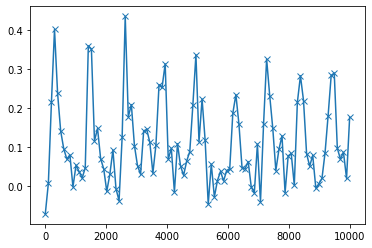

In [1]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=100)

# data
data = mv.get_model_noisy()(mv.p_true)

plt.plot(data['K'], 'x-')

In [2]:
print(mv.p_true)

{'dc': 20, 'membrane_dim': 10}


In [4]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

# define the analysis
for pop_size in [100, 1000]:
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_sde = abc.new("sqlite:///h_hh.db", data)
    history_sde = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-25 10:41:40.264433, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.5231e+02 for t=0.
INFO:ABC:t: 0, eps: 205.9692817994543.
DEBUG:Acceptor:Encountered pd=1.5497e+02 > c=1.5231e+02, thus weight=1.0130e+00.
DEBUG:Acceptor:Encountered pd=1.5238e+02 > c=1.5231e+02, thus weight=1.0003e+00.
INFO:ABC:Acceptance rate: 100 / 315 = 3.1746e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=1.5497e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [156.35345166769503].
INFO:ABC:t: 1, eps: 156.35345166769503.
DEBUG:Acceptor:Encountered pd=1.5558e+02 > c=1.5497e+02, thus weight=1.0039e+00.
DEBUG:Acceptor:Encountered pd=1.5503e+02 > c=1.5497e+02, thus weight=1.0004e+00.
DEBUG:Acceptor:Encountered pd=1.5549e+02 > c=1.5497e+02, thus weight=1.0033e+00.
DEBUG:Acceptor:Encountered pd=1.5532e+02 > c=1.5497e+02, thus weight=1.0023e+00.
INFO:ABC:Acceptance rate: 100 / 366 = 2.7322e-01, ESS=7.4526e+01.
DEBUG:Acceptor:pdf_norm=1.55

  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
KeyboardInterrupt
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 474, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 926, in communicate
    stdout = self.stdout.read()
KeyboardInterrupt
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subproces

KeyboardInterrupt: 

In [ ]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_sde)
pyabc.visualization.plot_epsilons(history_sde)
pyabc.visualization.plot_effective_sample_sizes(history_sde)

# Plots

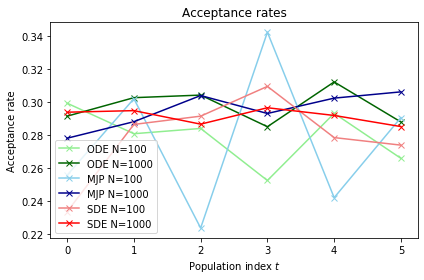

In [3]:
import pyabc
import matplotlib.pyplot as plt
%matplotlib inline

pop_sizes = [100, 1000]
h_cr_100 = pyabc.History("sqlite:///h_cr.db", _id=1)
h_cr_1000 = pyabc.History("sqlite:///h_cr.db", _id=2)
h_mrna_100 = pyabc.History("sqlite:///h_mrna.db", _id=1)
h_mrna_1000 = pyabc.History("sqlite:///h_mrna.db", _id=2)
h_hh_100 = pyabc.History("sqlite:///h_hh.db", _id=1)
h_hh_1000 = pyabc.History("sqlite:///h_hh.db", _id=2)

histories = [h_cr_100, h_cr_1000,
             h_mrna_100,h_mrna_1000,
             h_hh_100,h_hh_1000]
labels = ["ODE N=100", "ODE N=1000", "MJP N=100", "MJP N=1000", "SDE N=100", "SDE N=1000"]
colors = ["lightgreen", "darkgreen", "skyblue", "darkblue", "lightcoral", "red"]
pyabc.visualization.plot_acceptance_rates_trajectory(histories, labels, colors=colors)